In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('train_data.csv')
df2 = pd.read_csv('test_data.csv')


In [3]:
df1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [4]:
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [5]:
x_train = df1.drop("label", axis=1)
y_train = df1["label"]
x_test = df2.drop("label", axis=1)
y_test = df2["label"]

In [6]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(128, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(loss ="categorical_crossentropy", optimizer=SGD(0.01), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
e=11
h = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=e, batch_size=128)

Epoch 1/11
391/391 [==============================] - 8s 18ms/step - loss: 2.3254 - accuracy: 0.1172 - val_loss: 2.2917 - val_accuracy: 0.1602
Epoch 2/11
391/391 [==============================] - 4s 10ms/step - loss: 2.2870 - accuracy: 0.2055 - val_loss: 2.2824 - val_accuracy: 0.2408
Epoch 3/11
391/391 [==============================] - 4s 10ms/step - loss: 2.2779 - accuracy: 0.2295 - val_loss: 2.2729 - val_accuracy: 0.2335
Epoch 4/11
391/391 [==============================] - 4s 10ms/step - loss: 2.2671 - accuracy: 0.2513 - val_loss: 2.2603 - val_accuracy: 0.2523
Epoch 5/11
391/391 [==============================] - 4s 11ms/step - loss: 2.2539 - accuracy: 0.2523 - val_loss: 2.2460 - val_accuracy: 0.2602
Epoch 6/11
391/391 [==============================] - 4s 10ms/step - loss: 2.2363 - accuracy: 0.2569 - val_loss: 2.2273 - val_accuracy: 0.2571
Epoch 7/11
391/391 [==============================] - 4s 10ms/step - loss: 2.2120 - accuracy: 0.2580 - val_loss: 2.1971 - val_accuracy: 0.2649

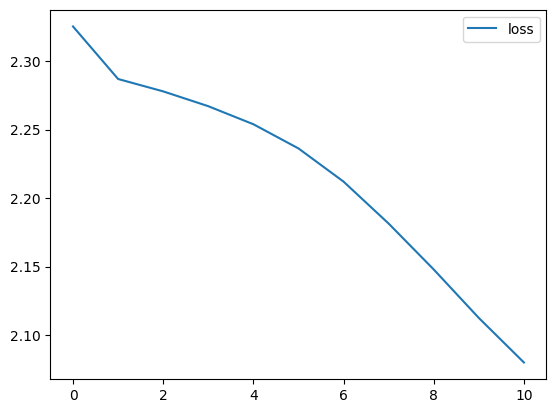

In [13]:
plt.plot(np.arange(0,e), h.history['loss'], label='loss')
plt.legend()

In [14]:
y_pred = model.predict(x_train, batch_size=128)

391/391 [==============================] - 2s 5ms/step


In [15]:
y_pred.shape

(50000, 10)

In [16]:
y_test.shape

(10000, 10)

In [17]:
x_test.shape

(10000, 3072)

In [22]:
# Assuming y_pred has shape (50000, 10) and y_test has shape (10000, 10)
desired_size = 10000

# Randomly sample indices
indices = np.random.choice(50000, size=desired_size, replace=False)

# Adjust both y_pred and y_test
y_pred2 = y_pred[indices, :]
y_test2 = y_test[:desired_size, :]
accuracy_score(y_pred2.argmax(axis=1), y_test2.argmax(axis=1))

0.0997